In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

features = pd.read_csv('crx.data')
features.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Result']

# In the data set empty values are represented as '?' so we replace them with NaN.
features = features.replace({'?': np.NaN})

features['A2'] = features['A2'].astype(float)
features = features.drop(columns=['A14'])

#There are two types of values in Result column: '+' and '-'. Let's transform them to zeroes and ones using LabelEncoder.
features['Result'] = LabelEncoder().fit_transform(features['Result'])

In [2]:
# Let's replace missing values with most frequent.
imp = SimpleImputer(strategy='most_frequent')
imp.fit(features)
features_imp = imp.transform(features)

In [3]:
features = pd.DataFrame(
    data=features_imp, 
    columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'Result'])

features['A2'] = features['A2'].astype(float)
features['A3'] = features['A3'].astype(float)
features['A8'] = features['A8'].astype(float)
features['A11'] = features['A11'].astype('int64')
features['A15'] = features['A15'].astype('int64')
features['Result'] = features['Result'].astype(int)

features.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15,Result
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,0
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,0
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,0
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,0
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,0,0


In [4]:
# Since our data set has lots of categorical values which are represented as strings we have to 
# somehow convert them into numbers. We can do this using get_dummies method from Pandas.
features = pd.get_dummies(features)

features.head(5)

,A2,A3,A8,A11,A15,Result,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,58.67,4.460,3.04,6,560,0,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
1,24.50,0.500,1.50,0,824,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
2,27.83,1.540,3.75,5,3,0,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
3,20.17,5.625,1.71,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,32.08,4.000,2.50,0,0,0,0,1,0,1,...,0,0,1,1,0,0,1,1,0,0


In [5]:
X = features.drop('Result', axis=1)
y = features['Result']

In [6]:
# Let's split our set into train and test sets where test set will be 33 % of the original one.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [7]:
def plot_confusion_matrix_sns(cm):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.heatmap(cm, annot=True, ax=ax, cmap='GnBu', fmt='g')
    ax.set_ylabel('True', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)
    
def print_prediction_assessment(predictions, y):
    test_acc = accuracy_score(y, predictions)
    test_prec = precision_score(y, predictions)
    test_recall = recall_score(y, predictions)
    f1 = (2 * test_prec * test_recall) / (test_prec + test_recall)
    cm = confusion_matrix(y, predictions)
    print('acc =', test_acc, '| prec =', test_prec, '| rec =', test_recall, '| f1 =', f1)
    plot_confusion_matrix_sns(cm)

acc = 0.8508771929824561 | prec = 0.9230769230769231 | rec = 0.8120300751879699 | f1 = 0.864


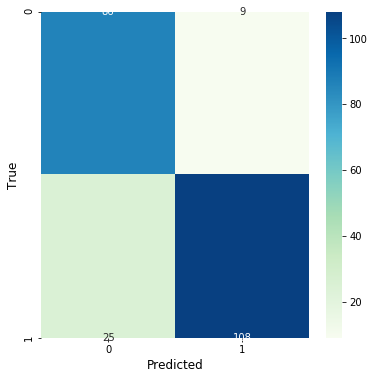

In [8]:
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=12345)

dt = dt.fit(X_train, y_train)

predictions = dt.predict(X_test)
print_prediction_assessment(predictions, y_test)

acc = 0.8245614035087719 | prec = 0.8661417322834646 | rec = 0.8270676691729323 | f1 = 0.8461538461538461


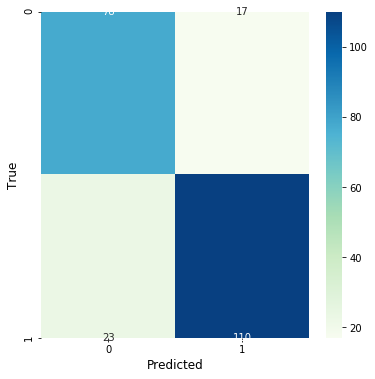

In [9]:
rf = RandomForestClassifier(n_estimators=3, max_depth=None, random_state=100)
rf = rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
print_prediction_assessment(predictions, y_test)

In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

acc = 0.7631578947368421 | prec = 0.7925925925925926 | rec = 0.8045112781954887 | f1 = 0.7985074626865671


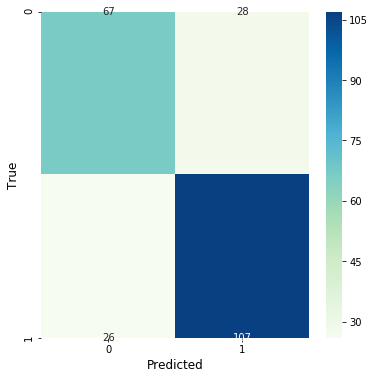

In [11]:
knnc = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knnc = knnc.fit(X_train, y_train)

predictions = knnc.predict(X_test)
print_prediction_assessment(predictions, y_test)

In [12]:
# To measure our success let's use F1 Score because it allows us to find balance between Precision and Recall.
# DecisionTreeClassifier: 0.864
# RandomForestClassifier: 0.846
# KNeighborsClassifier: 0.798
# As we can see decision tree and random forest classifiers are more appropriate for our data set than k neighbours. 